# 棄却サンプリング

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

0.00013383022576488537

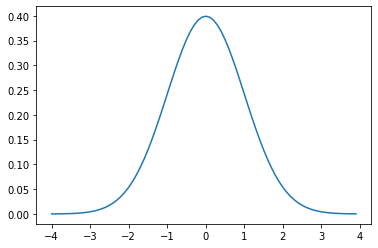

In [32]:
X = np.arange(-4,4,0.1)
Y = norm.pdf(X,0,1)
# Y
plt.plot(X,Y,label='$kq$')
norm.pdf(4,0,1)

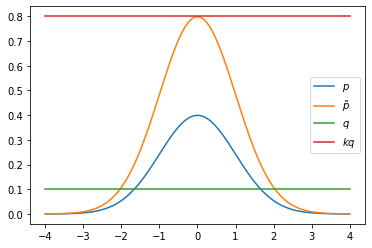

In [8]:
# [-4,4]の1000個のデータ

x=np.linspace(-4, 4,1000)

norm=stats.norm(loc=0, scale=1)

# 正規化定数,
Z_p=2
# p(z),gauss
def childa_p(z):
    return norm.pdf(z)*Z_p

# p(z),正規化された値，サンプリングできない
p_data=childa_p(x)/Z_p
plt.plot(x,p_data,label='$p$')

# サンプリング可能な~p(z)
childa_p_data=childa_p(x)
plt.plot(x,childa_p_data,label='$\~p$')

# q(z),一様分布
q_data = np.linspace(0.1, 0.1, 1000)
plt.plot(x,q_data,label='$q$')

# kq(z)
k = 8
kq_data=k*q_data
plt.plot(x,kq_data,label='$kq$')
plt.legend()
plt.show()

In [9]:
# 棄却サンプリング
def sampling():
    # 採択するまでループ
    while True:
        # 提案分布q(z)([-4.4]の一様分布)からサンプリング
        z = np.random.uniform(-4, 4)
        # [0,kq(z)]の一様分布からサンプリング
        u = k*np.random.uniform(0, 0.1)
        # 棄却するか判定
        if childa_p(z) > u:
            return z

In [10]:
sampling()

0.04569420073360497

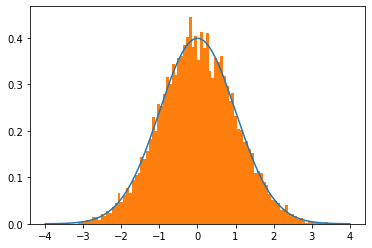

In [11]:
# サンプル数
N = 10000

samples = np.array([sampling() for i in range(N)])
# plt.xlim(-1, 1)
plt.plot(x, p_data)
# plt.plot(x, samples)
plt.hist(samples, bins=100,density=True)
plt.show()# 棄却サンプリングの実験